# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:34:48.458420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:34:51.835983
2025-04-14 20:34:51.835983


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:34:46"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

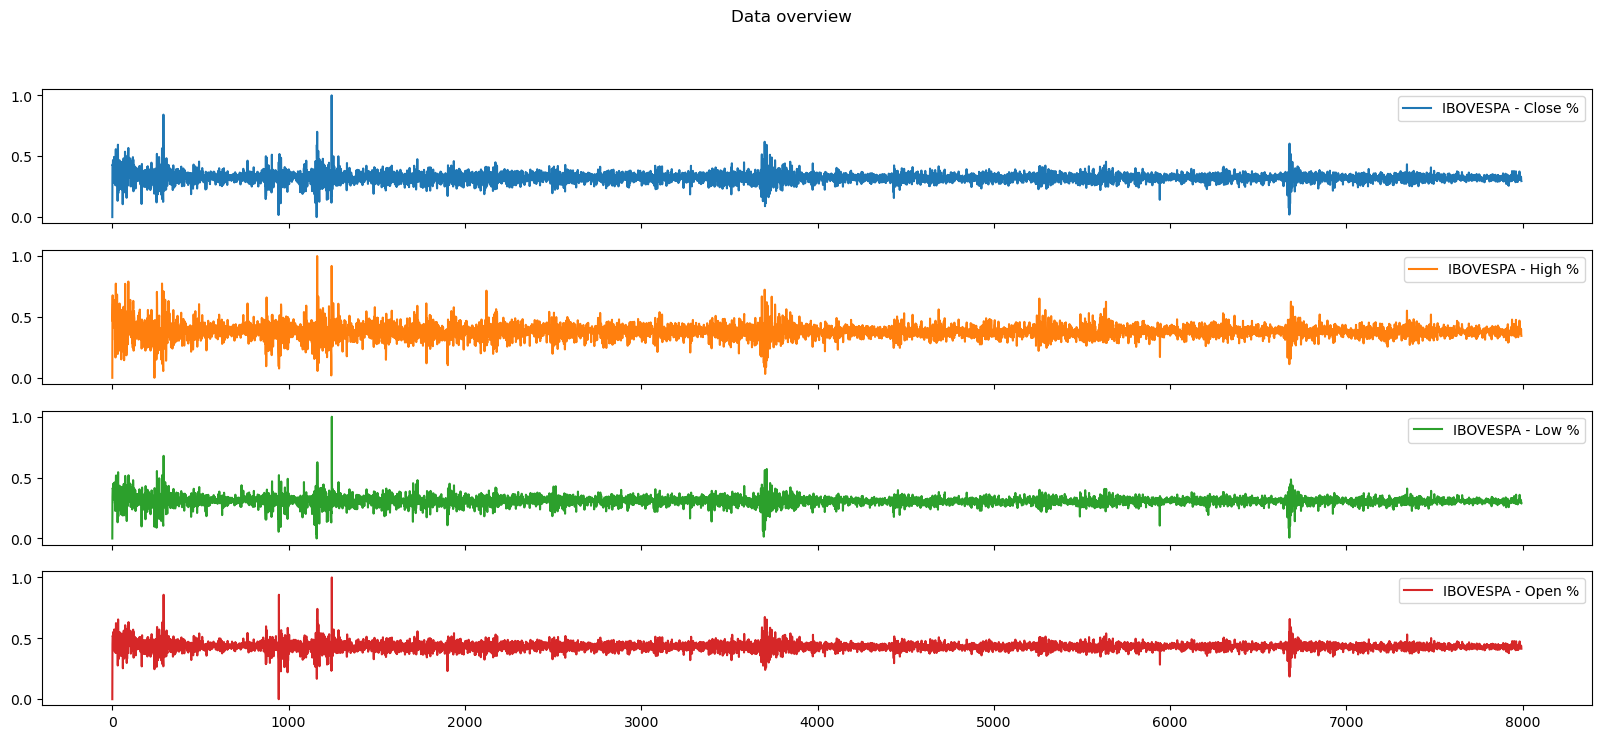

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

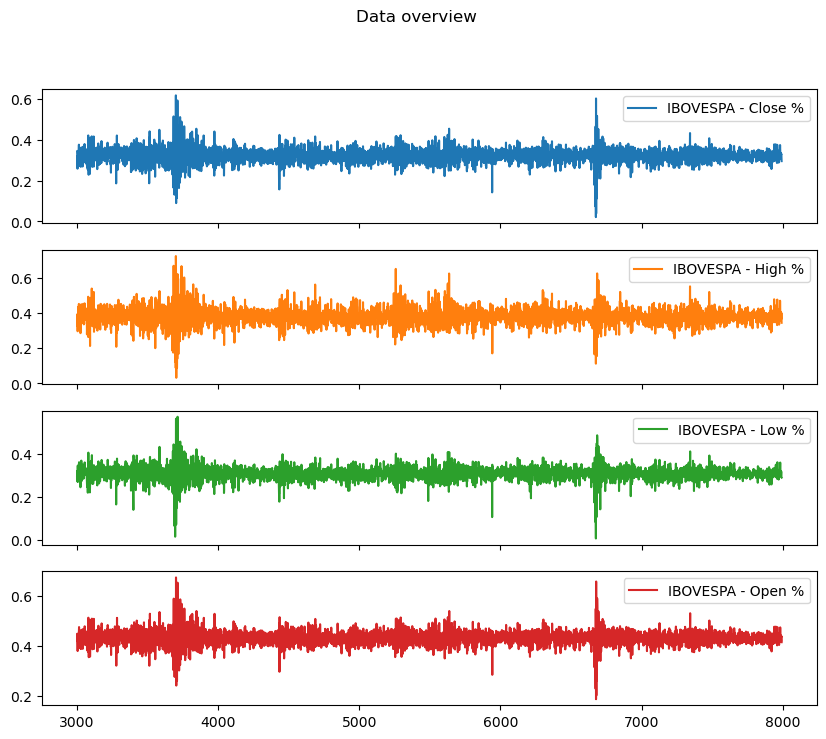

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

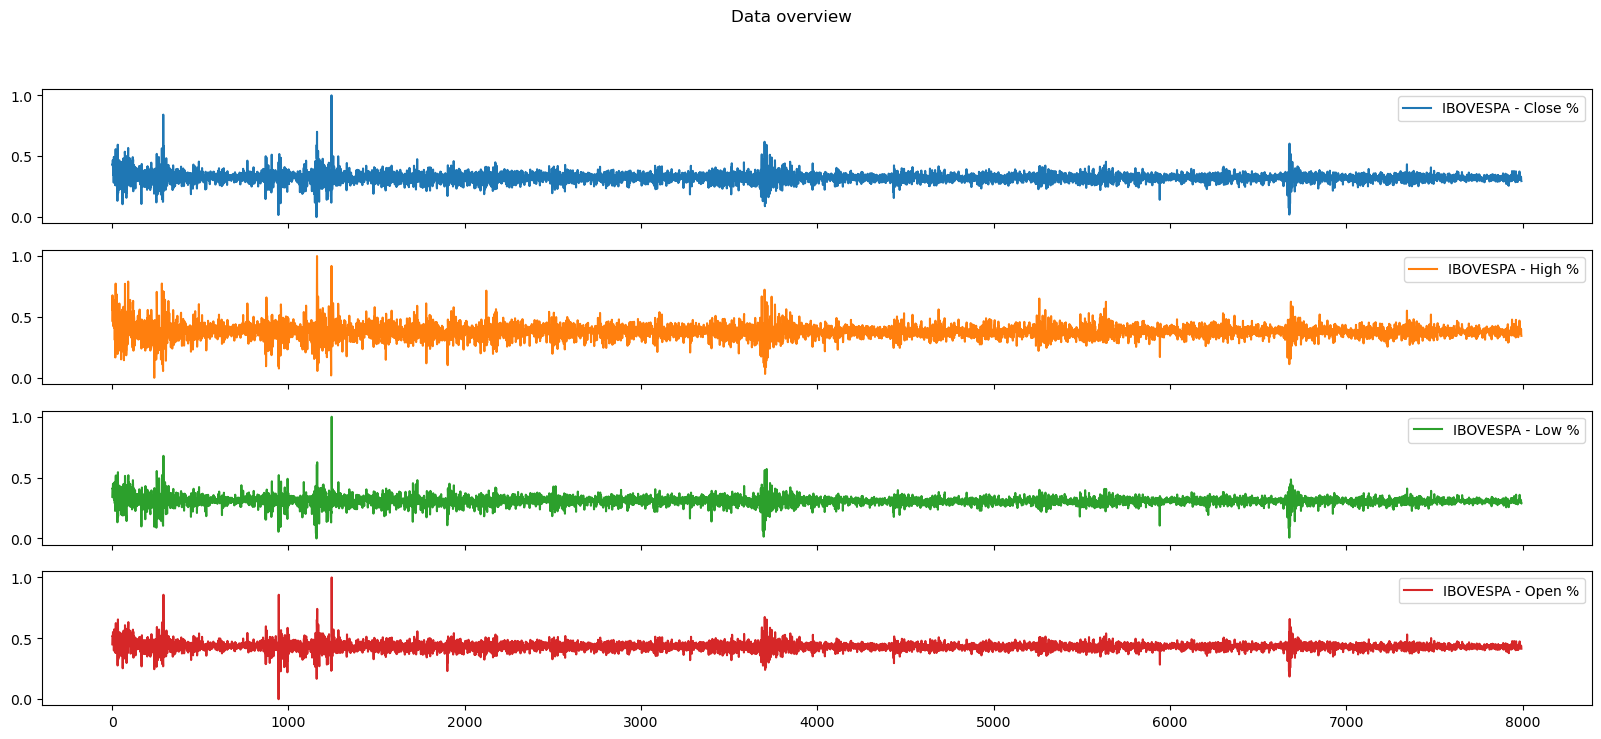

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close %']

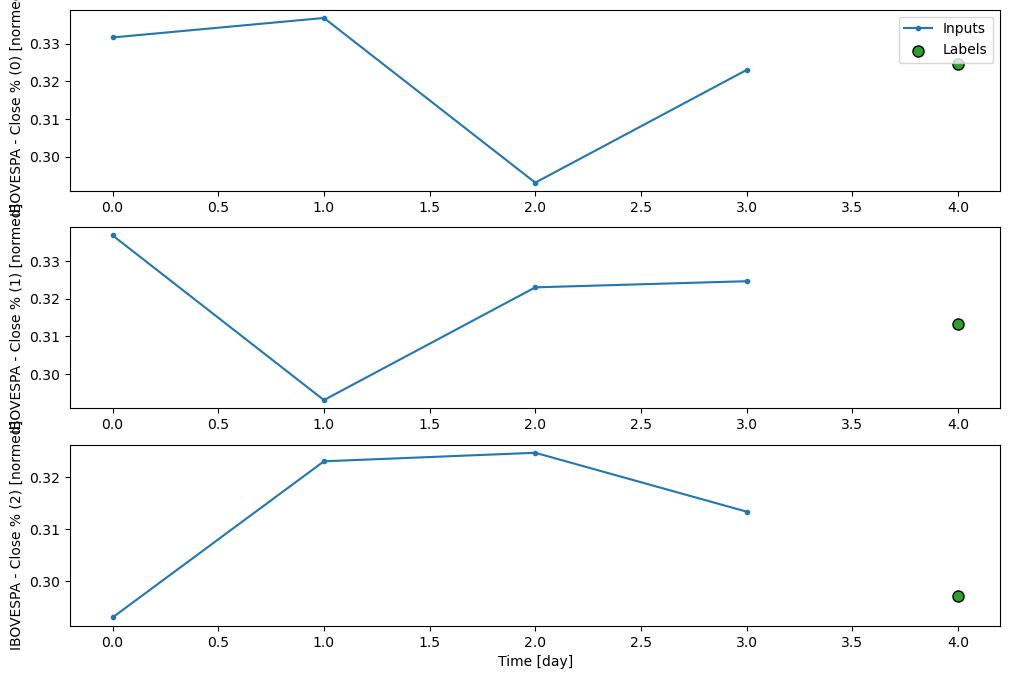

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18:22 5s/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3872

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 75.5502 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.3042   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 59.6801 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2551

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 49.0784 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2212

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 43.2008 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2011

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 6593.8364 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1866

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 40448.6445 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1761

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 60602.0898 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1674

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 74346.7500 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1591

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 81584.5156 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1529

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 86064.6719 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1475

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 88738.8047 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1427

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 90199.7812 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1384

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 90830.2578 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1345

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 90884.5078 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1310

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 90535.6094 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1278

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 90107.6719 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1257

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 89449.3672 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1233

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 88673.0703 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1212

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 87660.9766 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1188

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 86729.8281 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1169

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 85594.6406 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1148

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 84427.2031 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1128

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 83243.5234 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1110

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 82055.4453 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1092

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 80703.4141 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1073

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 79532.5469 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1058

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 78377.8125 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1043

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 77242.4766 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1029

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 76128.8359 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1016

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 75038.4531 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1003

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 73972.3594 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0991

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 72931.0938 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0979

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 71914.9219 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0968

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 70784.6797 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0956

238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 70646.6719 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0954 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 4.1727 - val_mean_squared_error: 3.0476e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 24.0256 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1137

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 23.7085 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0970 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.5156 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.8500 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0873

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.4700 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0826

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 7023.5869 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 43202.0352 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 62273.5781 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 74824.3984 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 84287.6719 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 90183.6719 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 93773.9922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 95830.9141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96845.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 97141.4453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 96874.2578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 96275.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 95441.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 94444.8516 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 93336.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 92153.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 90923.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 89666.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 88398.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 87130.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 85870.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 84623.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 83395.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 82188.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 81006.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 79848.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 78716.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 77612.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 76533.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 75484.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9610 - val_mean_squared_error: 2.7200e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 23.9627 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1132

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 23.9993 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0966 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.5706 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.9000 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0869

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.6134 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0827

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 20.0312 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 40557.6289 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0781

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 64531.6992 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 79235.8672 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 88405.5625 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 94109.1797 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 97562.2500 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 99077.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 100259.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100656.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100506.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 99972.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 99297.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 98179.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 97058.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 95851.4531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 94588.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 93105.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 91792.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 90477.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 89170.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 87876.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 86600.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 85346.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 84117.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 82913.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 81737.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 80588.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 79309.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 78221.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9042 - val_mean_squared_error: 2.6286e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 23.9072 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1129

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 23.3284 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.1121 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0915

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4487 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0858

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 20.0535 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 7321.8276 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0780

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 45043.1445 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 67498.7344 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 81320.1094 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 90879.0391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 95871.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 98851.8906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100480.4141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101183.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 101244.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0671

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 100856.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 100380.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 99510.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 98471.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 97315.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 96082.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 94799.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 93489.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 92167.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 90845.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 89531.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 88047.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 86769.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 85515.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 84459.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 83423.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 82239.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 81083.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 79955.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 78856.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 78702.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9586 - val_mean_squared_error: 2.7106e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 24.0243 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1134

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 23.1892 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.8131 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 20.8957 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.6743 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 13839.1953 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 48235.1641 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 68836.1016 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 81555.7266 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 89498.3203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 94415.0469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 97350.0469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98953.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 99646.2891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 99706.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 99324.1641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 98512.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 97430.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 96171.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 95150.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 94085.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 92808.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 91512.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 90208.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 88909.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 87620.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 86348.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 85096.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 83867.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 82494.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 81320.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 80174.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 79055.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 77964.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 77506.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 4.0687 - val_mean_squared_error: 2.8667e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 24.1849 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1142

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 23.0466 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0969 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.5276 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 20.8337 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0860

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.2229 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 7345.2207 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 45191.4219 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 67721.3750 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 83087.2969 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91179.1484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96188.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99178.4453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100812.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 101308.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 101560.7578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 101617.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 101458.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 100919.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 100109.1641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 99108.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 97977.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 96579.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 95298.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 93987.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 92851.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 91524.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 90202.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 88893.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 87603.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 86334.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 85089.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 83871.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 82679.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 81515.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 80220.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 78962.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8743 - val_mean_squared_error: 2.5816e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 23.8646 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.0731 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.2169 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.2863 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0838

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.0126 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 20446.1172 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 53110.3516 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 72784.3047 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 84965.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 92571.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 97265.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100043.5938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101531.1484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 102163.8516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 102079.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 101584.9219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 100803.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 99820.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 98530.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 97304.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 96022.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 94706.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 93375.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 92039.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 90710.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 89394.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 88281.2266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 87183.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 85924.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 84691.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 83485.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 82306.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 81156.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 80193.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 79407.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8869 - val_mean_squared_error: 2.5993e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 23.8973 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1128

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 22.9599 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0959 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.5543 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0916

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 20.6546 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.2292 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 14384.6309 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 50139.1367 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 71553.7656 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 84775.7812 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 93032.1016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 98143.0469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 101193.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103013.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103624.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103611.1641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103160.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 102402.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 101430.5234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 100309.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 99088.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 97800.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 96473.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 95125.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 93577.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 92227.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 90890.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 89570.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 88272.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 86998.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 85751.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 84531.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 83677.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82341.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81203.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 80567.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8452 - val_mean_squared_error: 2.5354e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 23.7821 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1122

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 22.8830 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.4082 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 20.7402 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2283 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6989 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 41816.9336 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 66536.5781 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 81698.0391 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91152.9297 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 97033.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100594.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102606.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103563.0938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 103790.2266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0665

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103507.8125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 102867.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 101977.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 100912.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 99727.4766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 98463.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97149.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 95613.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94451.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 93290.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92133.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90797.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89478.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88182.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 86911.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85666.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84449.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83260.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82100.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 80969.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80653.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8536 - val_mean_squared_error: 2.5491e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.8094 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 22.8799 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.3801 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 20.4668 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0845

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.1179 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14394.9590 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 50175.6641 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 73901.1328 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 86268.8047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 94824.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 99262.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101863.3359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103224.0156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 103731.6562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 103645.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 103143.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102350.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101352.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 100213.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 98979.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 97684.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 96352.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 94807.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 93452.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92102.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90766.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 89449.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88153.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86882.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85638.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84421.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83233.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82073.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80783.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80626.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8601 - val_mean_squared_error: 2.5596e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8275 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1124

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 22.8926 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0958 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.6068 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 20.9737 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0862

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.3956 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0808

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7432 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 37101.5625 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63647.4336 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 81614.4766 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91059.6953 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 96934.7031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100491.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102501.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103457.1641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103684.0625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103401.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 102762.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 101872.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 100808.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 99625.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98362.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97049.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 95708.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94355.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 92808.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91465.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90137.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88829.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87545.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86108.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 84880.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83681.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82510.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81367.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80570.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8555 - val_mean_squared_error: 2.5525e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 23.8149 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1124

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 22.8779 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0958  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.1439 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 20.4537 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0845

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.1049 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 7494.2324 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 37100.9961 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63646.4883 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 79864.1875 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 89965.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96258.6484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100090.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102286.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103455.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103682.5391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103328.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102647.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 101582.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100479.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99090.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624 

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 97803.2969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 96476.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 94934.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 93579.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92230.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90892.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89572.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88274.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86821.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85577.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84362.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83174.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82015.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80885.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80569.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8828 - val_mean_squared_error: 2.5938e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 23.8846 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 22.9093 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.4086 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0915

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 20.4928 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0846

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.1412 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 7489.2773 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 46080.0000 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 71507.8125 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 84721.3672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 92972.4062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 97496.2734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100423.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102623.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103457.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 103600.0938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103259.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 102578.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 101660.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 100577.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 99381.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 97924.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96602.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95064.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93710.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92168.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 90831.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89513.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88215.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 86943.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85696.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84477.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83286.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82124.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 80991.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80515.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8523 - val_mean_squared_error: 2.5471e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.8047 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 22.8931 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.2075 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 20.5231 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0845

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.0985 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0792

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 14406.9668 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 50217.4062 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 69205.4844 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 81738.7344 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91198.3281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 97082.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100644.5547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102657.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103614.6719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 103841.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0665

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 103624.6016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 103131.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102303.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101281.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100296.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 99422.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98140.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 96815.9453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 95467.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 94111.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 92757.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91413.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90086.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88779.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 87496.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86239.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85010.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 83808.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82635.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81491.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80693.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8388 - val_mean_squared_error: 2.5102e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 23.7069 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 22.8592 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.4158 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.7580 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.2498 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7829 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 37297.4688 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63983.5547 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 80287.1484 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 90441.7188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96768.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100621.0703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102591.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103697.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 104207.5391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 104121.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 103617.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102819.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 101970.3672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100843.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99615.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623 

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 98321.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96987.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95631.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94464.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93105.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91756.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90424.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89112.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87825.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86563.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85329.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83953.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82780.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81635.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80996.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8409 - val_mean_squared_error: 2.5278e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7628 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1120

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 22.8755 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.1925 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0903

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.5101 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0844

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.1632 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 7533.6562 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 50404.2617 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 71932.2344 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 85224.2344 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 93524.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 98662.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101729.3516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103405.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104128.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0671

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104191.8594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 103792.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103068.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102117.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101008.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 99792.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98506.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97368.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96211.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94850.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93683.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92329.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90990.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 89669.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88187.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86918.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85676.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84462.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83276.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82119.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80993.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8414 - val_mean_squared_error: 2.5288e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7654 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 22.8848 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.4493 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0912

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 20.7939 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2851 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.7545 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 41955.5000 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 69400.2344 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 83611.2734 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 92481.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 97986.3125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101297.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103139.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103977.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104097.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103698.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102975.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102024.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 100917.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 99702.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98416.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97088.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95542.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94181.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 92824.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91670.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90528.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89215.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87925.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86482.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85249.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84044.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82868.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81720.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80920.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8391 - val_mean_squared_error: 2.5247e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 23.7548 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1120

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 22.8792 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0954 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.6424 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0920

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 21.0292 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.4557 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.8071 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 37329.3203 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 64038.1914 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 80355.7109 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 90518.9453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 96851.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101108.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103130.6875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104092.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104320.6484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104036.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 103393.5703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102498.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101427.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100237.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98966.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97645.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96296.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94934.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93572.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92219.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90690.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89374.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88082.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86816.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85752.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84536.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83350.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82192.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81065.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8366 - val_mean_squared_error: 2.5137e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 23.7207 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1118

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 22.8565 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.3956 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.7348 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.2267 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.7554 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 26738.3574 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0760

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 57622.3203 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 76320.4141 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 89180.4062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 95948.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100524.3281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102729.4297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103817.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104134.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0665

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103913.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 103315.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102452.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101404.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100230.8047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98971.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97659.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96315.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94956.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93596.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92244.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90905.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89585.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88288.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87017.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85772.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84555.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83199.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82043.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81235.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80918.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8420 - val_mean_squared_error: 2.5065e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 23.6887 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1116

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 22.8537 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.4240 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0910

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.7724 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.2661 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7564.7896 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 46545.3281 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 69750.5547 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 84033.3438 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 92947.9062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 98480.9766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101808.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103659.8750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104502.4766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104646.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104302.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103614.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102687.5312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101593.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100385.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99101.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97771.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96414.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95047.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 93682.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92325.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90985.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89665.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88369.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86919.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85679.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84468.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83286.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82133.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81328.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8406 - val_mean_squared_error: 2.5079e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 23.6961 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 23.0137 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.6502 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.0464 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0859

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.4745 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.8241 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 37473.8047 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 67135.4922 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 82433.4531 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91973.4688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 97907.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101500.0000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103529.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104495.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104724.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104439.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103793.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102895.2344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101820.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100625.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99349.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 98023.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96669.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95302.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 94129.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92769.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91423.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90096.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88791.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87512.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86260.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85036.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83841.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82675.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81379.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8403 - val_mean_squared_error: 2.5082e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 23.6980 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 22.8524 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.4115 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0910

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.7577 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.1714 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.7805 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0772

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 37433.4258 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 64216.8438 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 80579.9062 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 90771.5078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 97121.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100987.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103203.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104296.3359 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104611.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104327.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103682.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102640.3125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101546.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100338.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 98868.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 97533.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96175.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94808.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93444.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92091.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90943.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89437.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88145.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86879.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85640.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84429.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83081.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81933.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81291.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8566 - val_mean_squared_error: 2.5015e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 23.6207 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 22.8329 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.4298 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 20.7883 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.4629 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0805

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8875 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 32460.1738 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 58085.9922 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 76934.5781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 87277.9922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 94189.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 99363.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102452.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104140.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104869.2969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 104932.6250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104530.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103801.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102843.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 101726.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 100501.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99206.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 97867.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96504.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94937.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93569.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92213.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 90874.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89556.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88263.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86996.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85757.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84547.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83365.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82213.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81569.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8485 - val_mean_squared_error: 2.5022e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 23.6545 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1114

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 22.8476 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.4483 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0909

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.8072 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0850

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.3040 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0799

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7604.0684 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 46787.3477 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 72605.6016 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 86022.0469 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 94399.7734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 99585.8828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102681.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104373.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104973.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105204.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104917.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104269.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103366.4375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102286.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 101086.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99804.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 98472.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96916.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95542.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94169.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92806.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91458.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90131.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88828.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87551.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86301.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84908.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83552.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82397.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81751.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8466 - val_mean_squared_error: 2.5031e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 23.6649 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1115

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 22.8396 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.1900 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 20.5195 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.1779 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0794

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7620.5830 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 46889.3945 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 70266.2344 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 84654.6562 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 93635.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 99209.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 102561.5078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104601.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 105333.1328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105396.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 104905.4844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104135.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 103298.1562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102344.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101127.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99834.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98494.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96931.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95357.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93983.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92620.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91276.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89952.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88653.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87381.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86137.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84921.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83734.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82413.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81930.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8795 - val_mean_squared_error: 2.5891e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 23.8765 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.0014 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0958 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.0910 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.1628 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0838

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.0514 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 7574.0991 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 46603.4688 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 69837.7734 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 84138.4609 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 93064.1797 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 98604.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101936.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103789.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104633.2344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104777.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104352.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103624.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102668.3125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 101553.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 100330.9531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99037.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 97893.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96730.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95362.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 93994.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92634.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91290.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89965.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88847.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87568.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86315.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85090.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83894.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82727.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81430.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8520 - val_mean_squared_error: 2.5465e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.8036 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 22.8624 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.1224 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.4371 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0844

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.0911 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7588.2637 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 46690.5977 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0754

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 72455.5156 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 85844.2500 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 94204.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 99380.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102469.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104157.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104886.5859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 104949.9219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104547.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103818.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102709.0547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 101574.0234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100337.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98843.4844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615 

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 97495.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96128.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 94756.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93390.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92421.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91079.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89758.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88461.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87190.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85947.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84732.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83379.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82226.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81582.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8705 - val_mean_squared_error: 2.5759e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 23.8531 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 22.8641 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0959 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.3034 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 20.6271 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.1195 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.5828 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 42227.1484 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 67189.4688 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 82499.7734 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 92047.4844 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 97986.2422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100741.5547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102609.9297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103807.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104651.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0671

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104795.4219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 104450.5234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103762.3750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102833.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 101737.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 100527.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99242.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97717.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96161.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94791.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93426.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92072.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90735.1797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89419.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88494.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87402.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86153.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84932.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83740.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82577.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81444.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8712 - val_mean_squared_error: 2.5770e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0050


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:0s:596ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.021894998848438263 - MSE: 0.0007430388359352946 - MAPE: 7.037374496459961 - RMSE: 0.0272587388753891


2025-04-14 20:35:58.575426: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:34:46',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:1m:0s:596ms',
 'TRAINING_EPOCHS': 28,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.021894998848438263,
   'MSE': 0.0007430388359352946,
   'MAPE': 7.037374496459961,
   'RMSE': 0.0272587388753891}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:35:58.812677: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.01891194097697735 - MSE: 0.00047591369366273284 - MAPE: 5.887756824493408 - RMSE: 0.021815447136759758


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 23.8550 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 22.8096 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 20.8196 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 18.7588 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14040.1865 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 48938.8320 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 74170.4375 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 88876.2969 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95223.4688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 99835.4531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 100976.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 101197.9531 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 100851.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 99951.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641 

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 99002.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 97908.4062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 96890.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 96362.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 96004.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 95823.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 94722.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 94537.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 94164.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 93601.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 93413.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 93225.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 91903.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 90960.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 90207.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 89085.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 87426.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 85092.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 83185.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 81509.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 79891.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 78638.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551


Loss: 0.028800765052437782 - MAE: 0.028800765052437782 - MSE: 0.0018437668913975358 - MAPE: 42079.3359375 - RMSE: 0.04293910786509514


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 5.0383 - mean_squared_error: 4.8398e-04 - root_mean_squared_error: 0.0220

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 4.1192 - mean_squared_error: 3.0579e-04 - root_mean_squared_error: 0.0174 


Loss: 0.012578279711306095 - MAE: 0.012578279711306095 - MSE: 0.00025770068168640137 - MAPE: 3.8711583614349365 - RMSE: 0.016053058207035065


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 2.8457 - mean_squared_error: 1.6753e-04 - root_mean_squared_error: 0.0129

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 4.2996 - mean_squared_error: 3.6516e-04 - root_mean_squared_error: 0.0189


Loss: 0.015114638954401016 - MAE: 0.015114638954401016 - MSE: 0.00042246378143318 - MAPE: 4.725076675415039 - RMSE: 0.02055392414331436


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

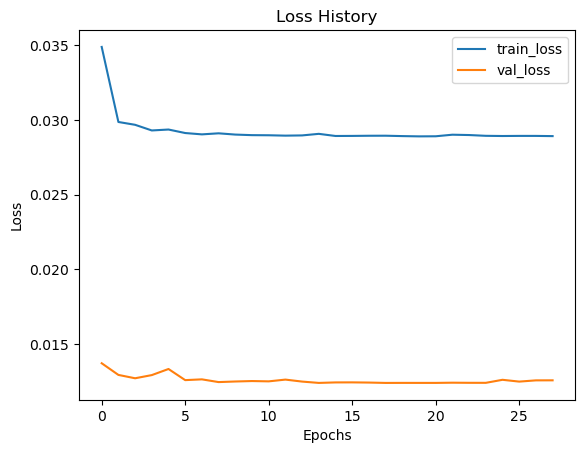

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

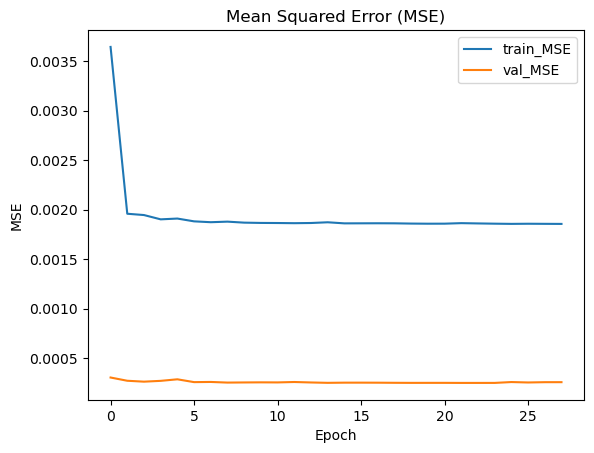

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

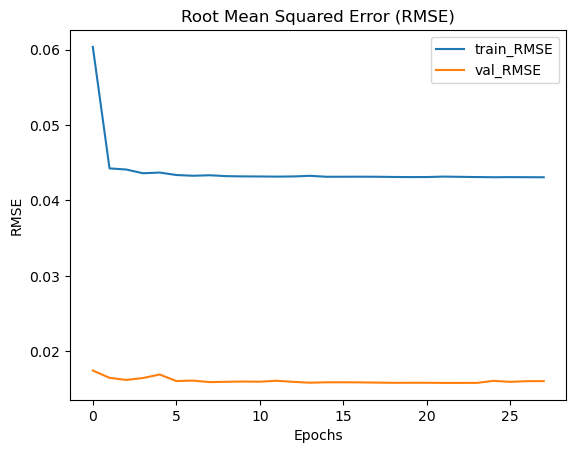

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

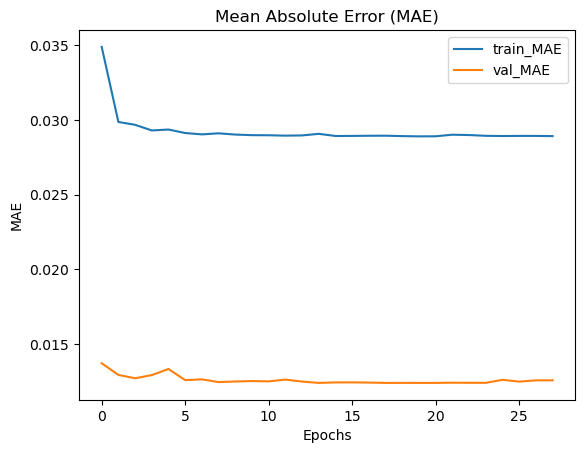

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

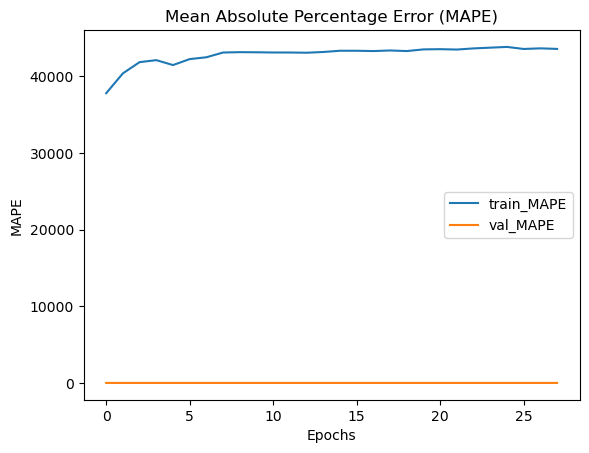

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:36:04.031441: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 4)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


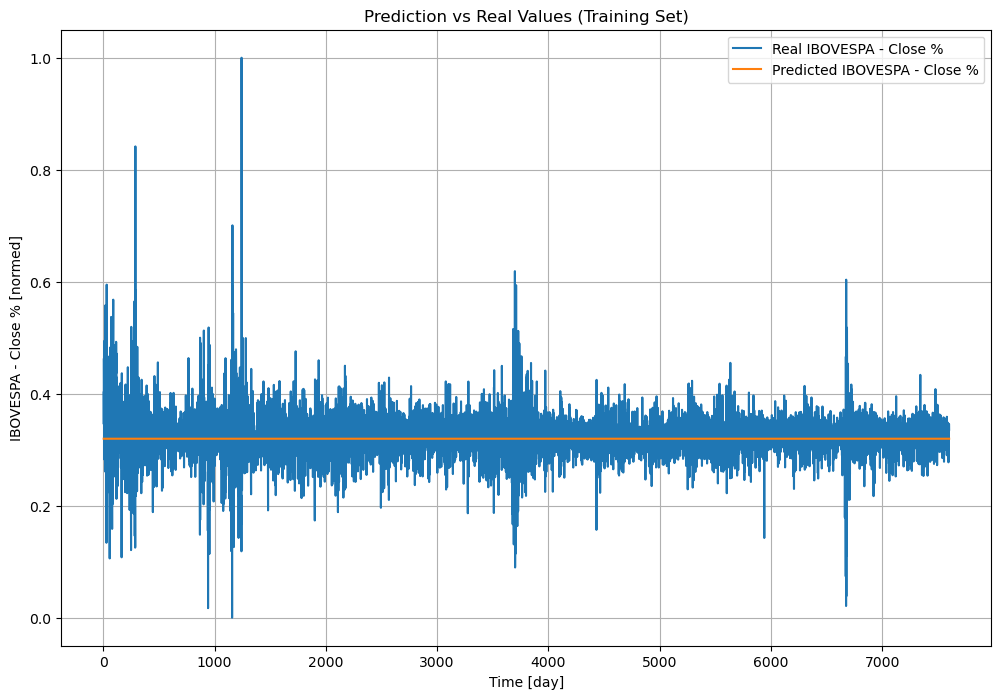

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


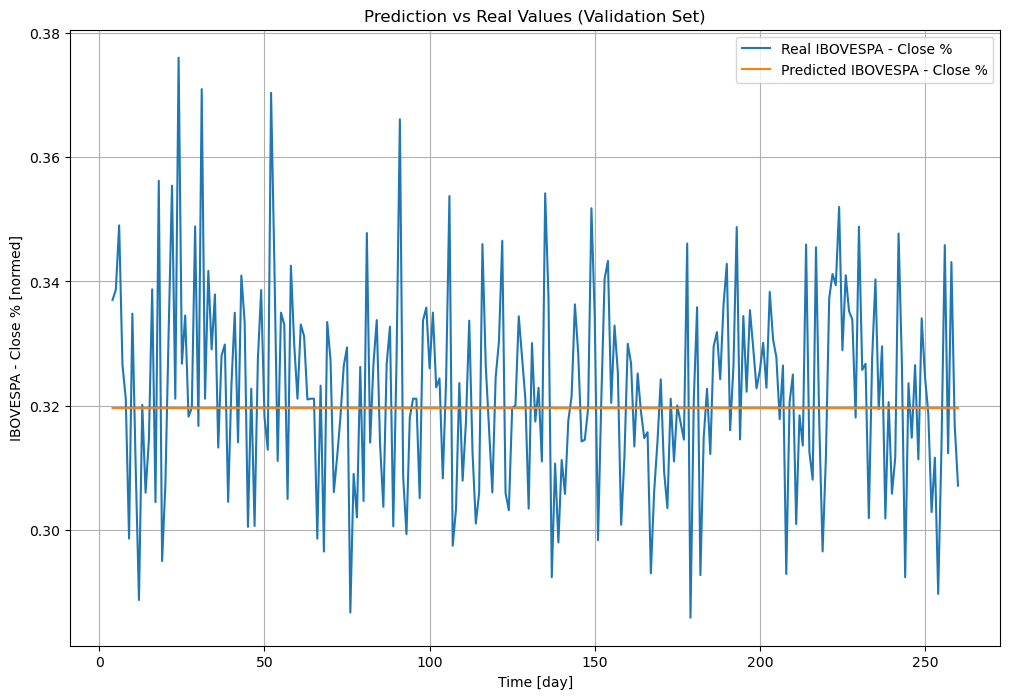

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


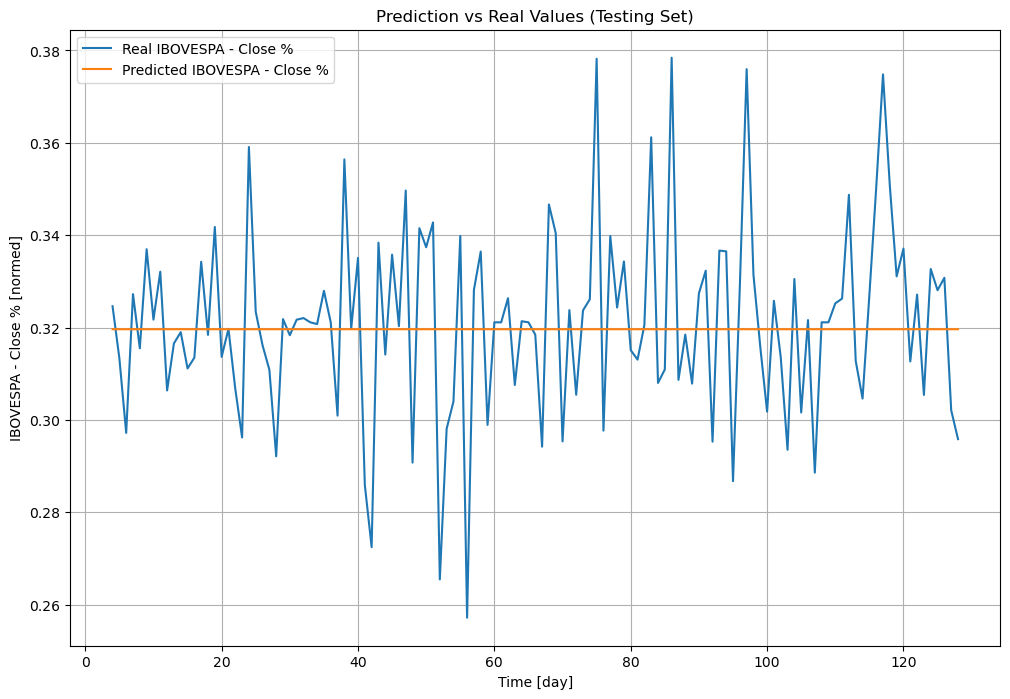

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

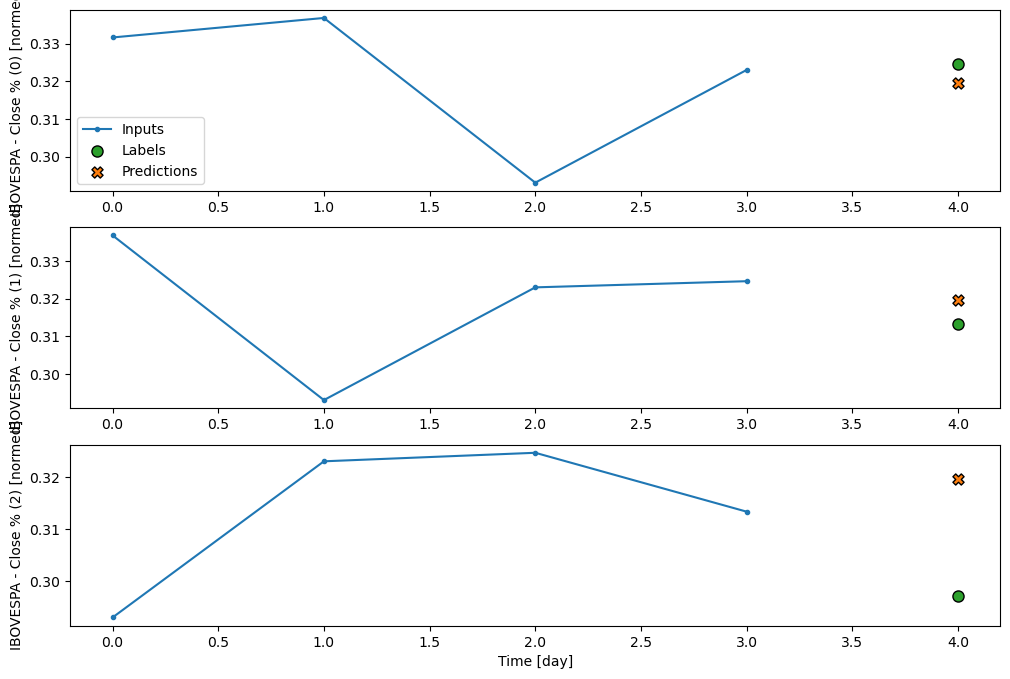

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:15s:999ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


array([[[0.31964496, 0.31964496, 0.31964496, ..., 0.31964496,
         0.31964496, 0.31964496]],

       [[0.319645  , 0.319645  , 0.319645  , ..., 0.319645  ,
         0.319645  , 0.319645  ]],

       [[0.31964496, 0.31964496, 0.31964496, ..., 0.31964496,
         0.31964496, 0.31964496]],

       ...,

       [[0.319645  , 0.319645  , 0.319645  , ..., 0.319645  ,
         0.319645  , 0.319645  ]],

       [[0.319645  , 0.319645  , 0.319645  , ..., 0.319645  ,
         0.319645  , 0.319645  ]],

       [[0.31964502, 0.31964502, 0.31964502, ..., 0.31964502,
         0.31964502, 0.31964502]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')